In [2]:
# Install and load packages ---------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import wbgapi as wb

In [13]:
# Load example datasets ---------------

data = wb.data.DataFrame('NY.GDP.PCAP.KD', time = 2018)
data

,NY.GDP.PCAP.KD
economy,
ABW,30536.667193
AFE,1544.077975
AFG,546.743010
AFW,1843.554695
AGO,2717.474121
...,...
XKX,4009.106423
YEM,1290.906786
ZAF,6199.891699


In [14]:
country_code = wb.economy.DataFrame()
country_code

,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
id,,,,,,,,,
ABW,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFE,Africa Eastern and Southern,True,NaN,NaN,,,,,
AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AFW,Africa Western and Central,True,NaN,NaN,,,,,
AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
YEM,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
ZAF,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria


In [15]:
data2 = pd.concat([data, country_code], axis=1)
data2

,NY.GDP.PCAP.KD,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
ABW,30536.667193,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFE,1544.077975,Africa Eastern and Southern,True,NaN,NaN,,,,,
AFG,546.743010,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AFW,1843.554695,Africa Western and Central,True,NaN,NaN,,,,,
AGO,2717.474121,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
...,...,...,...,...,...,...,...,...,...,...
XKX,4009.106423,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
YEM,1290.906786,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
ZAF,6199.891699,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria
ZMB,1368.601756,Zambia,False,28.2937,-15.39820,SSF,SSA,IDX,LIC,Lusaka


In [16]:
data3 = data2[data2['aggregate'] == False]
data3

,NY.GDP.PCAP.KD,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
ABW,30536.667193,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFG,546.743010,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AGO,2717.474121,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
ALB,4431.539181,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
AND,38301.450430,Andorra,False,1.5218,42.50750,ECS,,LNX,HIC,Andorra la Vella
...,...,...,...,...,...,...,...,...,...,...
XKX,4009.106423,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
YEM,1290.906786,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
ZAF,6199.891699,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria
ZMB,1368.601756,Zambia,False,28.2937,-15.39820,SSF,SSA,IDX,LIC,Lusaka


In [18]:
data3.rename(columns = {'NY.GDP.PCAP.KD':'GDP'}, inplace = True)
data3

/var/folders/t0/bh8jstj91y5ctmcqzzd24zyc0000gn/T/ipykernel_61098/502804678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,GDP,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
ABW,30536.667193,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFG,546.743010,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AGO,2717.474121,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
ALB,4431.539181,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
AND,38301.450430,Andorra,False,1.5218,42.50750,ECS,,LNX,HIC,Andorra la Vella
...,...,...,...,...,...,...,...,...,...,...
XKX,4009.106423,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
YEM,1290.906786,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
ZAF,6199.891699,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria
ZMB,1368.601756,Zambia,False,28.2937,-15.39820,SSF,SSA,IDX,LIC,Lusaka


In [19]:
data4 = data3.nsmallest(30, 'GDP', keep = 'all')
data4

,GDP,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
BDI,281.934732,Burundi,False,29.36390,-3.378400,SSF,SSA,IDX,LIC,Bujumbura
MWI,390.840707,Malawi,False,33.77030,-13.989900,SSF,SSA,IDX,LIC,Lilongwe
CAF,412.990203,Central African Republic,False,21.64070,5.630560,SSF,SSA,IDX,LIC,Bangui
SOM,425.416599,Somalia,False,45.32540,2.075150,SSF,SSA,IDX,LIC,Mogadishu
MDG,480.915251,Madagascar,False,45.71670,-20.466700,SSF,SSA,IDX,LIC,Antananarivo
COD,506.958274,"Congo, Dem. Rep.",False,15.32220,-4.325000,SSF,SSA,IDX,LIC,Kinshasa
NER,513.626786,Niger,False,2.10730,13.514000,SSF,SSA,IDX,LIC,Niamey
AFG,546.743010,Afghanistan,False,69.17610,34.522800,SAS,SAS,IDX,LIC,Kabul
MOZ,602.530495,Mozambique,False,32.57130,-25.966400,SSF,SSA,IDX,LIC,Maputo
TGO,612.785751,Togo,False,1.22550,6.122800,SSF,SSA,IDX,LIC,Lome


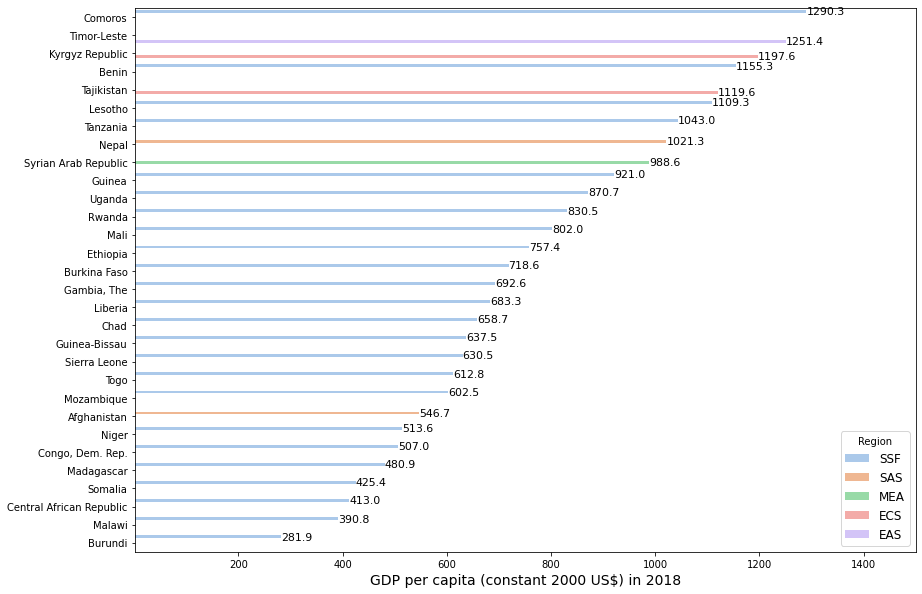

In [20]:
plt.figure(figsize=(14,10))

ax = sns.barplot(data=data4, x = 'GDP', y = 'name', hue = 'region', 
                 order=data4.sort_values('GDP',ascending = False).name,
                palette='pastel')
plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[1], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[2], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[3], fmt='%.1f', fontsize = 11)
plt.bar_label(ax.containers[4], fmt='%.1f', fontsize = 11)

ax.set_xlim(1,1500)

plt.ylabel('')
plt.xlabel('GDP per capita (constant 2000 US$) in 2018', fontsize = 14)
plt.legend(title = 'Region', loc = "lower right", fontsize=12)
plt.show()
